# 22.46 Procesamiento Adaptativo de Señales Aleatorias
# Proyecto 02
## Cancelación Activa de Ruido
Este trabajo desarrolla la síntesis de un sistema de cancelación activa de ruido basado en el algoritmo RLS, utilizando un enfoque donde sólo se busca modelar (de forma adaptativa) el camino acústico primario $P(z)$.

<table>
    <tr>
        <td>
            <img src='../support/drawing/scheme_iteration_01.png' style='width: 600px;'> </img>
        </td>
        <td>
            <img src='../support/drawing/headphone_paths.png' style='width: 600px;'> </img>
        </td>
    </tr>
</table

#### Grupo N° 1
* DAVIDOV, Gonzalo Joaquín
* FARALL, Facundo David
* KAMMANN, Lucas Agustín
* TROZZO, Rafael Nicolás

In [129]:
import importlib

In [130]:
import test_model
importlib.reload(test_model);

In [131]:
import anc_primary
importlib.reload(anc_primary);

In [132]:
import lms_primary
importlib.reload(lms_primary);

In [133]:
import plot_helpers
importlib.reload(plot_helpers);

In [134]:
import boseqc20_model
importlib.reload(boseqc20_model);

In [135]:
import numpy as np

# Banco de prueba para validar el algoritmo

In [109]:
N = 100 # Quantity of samples used for the simulation  
x = np.random.normal(size=N) # Gaussian white noise

In [110]:
headphone = test_model.TestHeadphone() # Create testbench model
headphone.set_noise(x) # Load the noise samples for the simulation
headphone.reset() # Reset the time instant

In [111]:
forget = 0.99
order = 10
e, w = anc_primary.anc_primary_rls(headphone, order=order, forget=forget, delta=np.var(x) * (1 - forget))

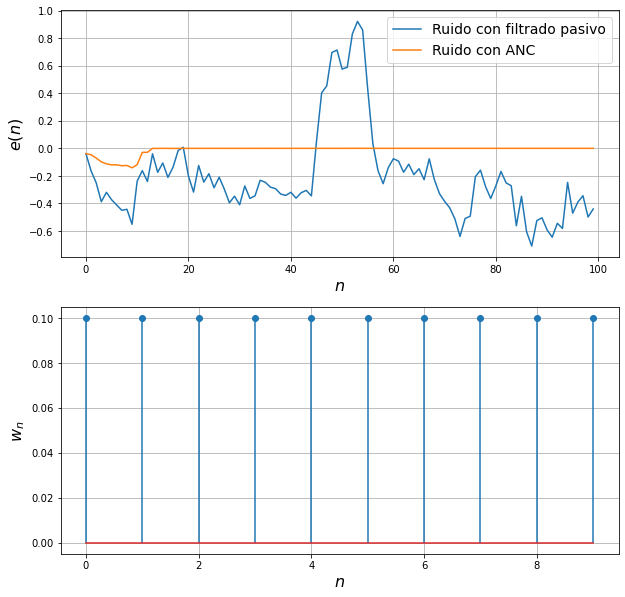

In [112]:
# Plot the ANC results
plot_helpers.plot_anc_results([headphone.d, e], w, weight_plot='response')

# Usando el Bose QC20 con RLS

In [113]:
N = 100000 # Quantity of samples used for the simulation  
x = np.random.normal(size=N) # Gaussian white noise

In [114]:
headphone = boseqc20_model.BoseQC20('../support/dataset/BoseQC20.json') # Create testbench model
headphone.set_noise(x[:3000]) # Load the noise samples for the simulation
headphone.reset() # Reset the time instant

In [115]:
forget = 0.999
order = 1000
e_rls, w_rls = anc_primary.anc_primary_rls(headphone, order=order, forget=forget, delta=np.var(x) * (1 - forget))

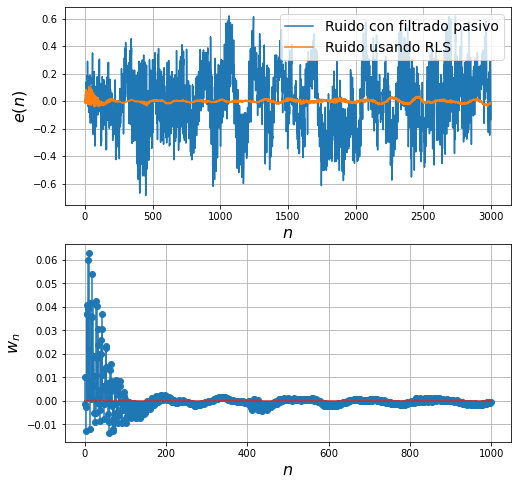

In [136]:
# Plot the ANC results
plot_helpers.plot_anc_results([headphone.d[:3000], e_rls], w_rls, weight_plot='response', labels=['Ruido con filtrado pasivo', 'Ruido usando RLS'])

# Usando el Bose QC20 con LMS

In [117]:
headphone.set_noise(x) # Load the noise samples for the simulation
headphone.reset() # Reset the time instant
step = 0.0001 # Step size for LMS
e_lms, w_lms = lms_primary.anc_primary_lms(headphone, order=order, step=step)

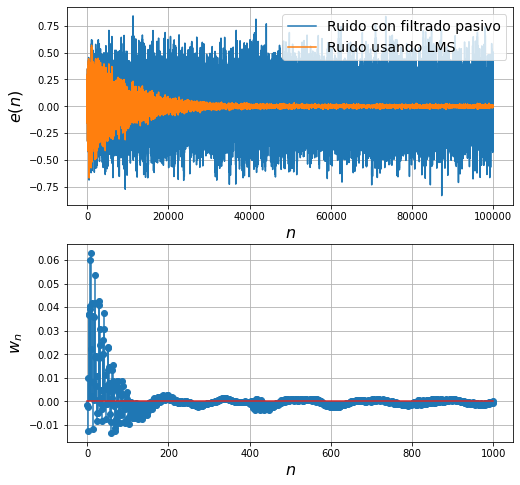

In [137]:
# Plot the ANC results
plot_helpers.plot_anc_results([headphone.d, e_lms], w_lms, weight_plot='response', labels=['Ruido con filtrado pasivo', 'Ruido usando LMS'])

# Comparando la atenuación en frecuencia

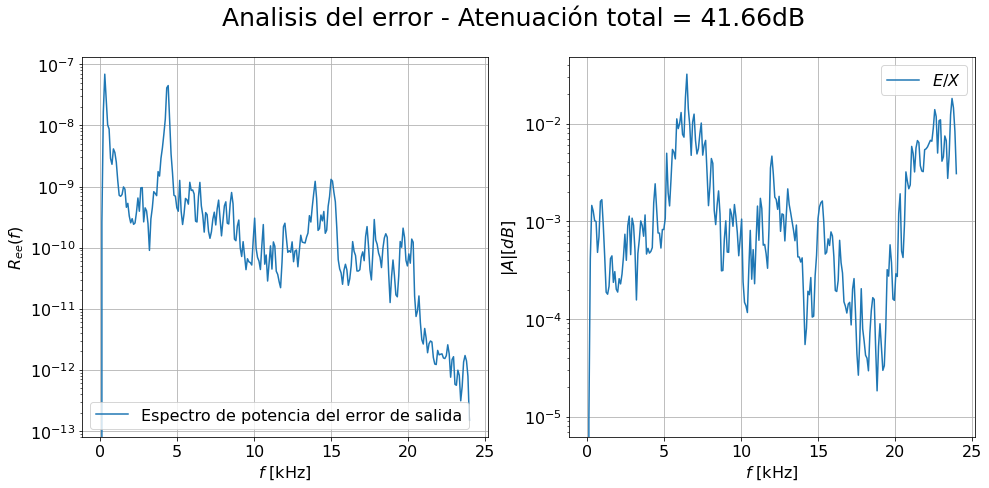

In [139]:
plot_helpers.plot_error_analysis(headphone.d[600:], e_rls[600:], 48000, 'Analisis del error', a_weighting=True)

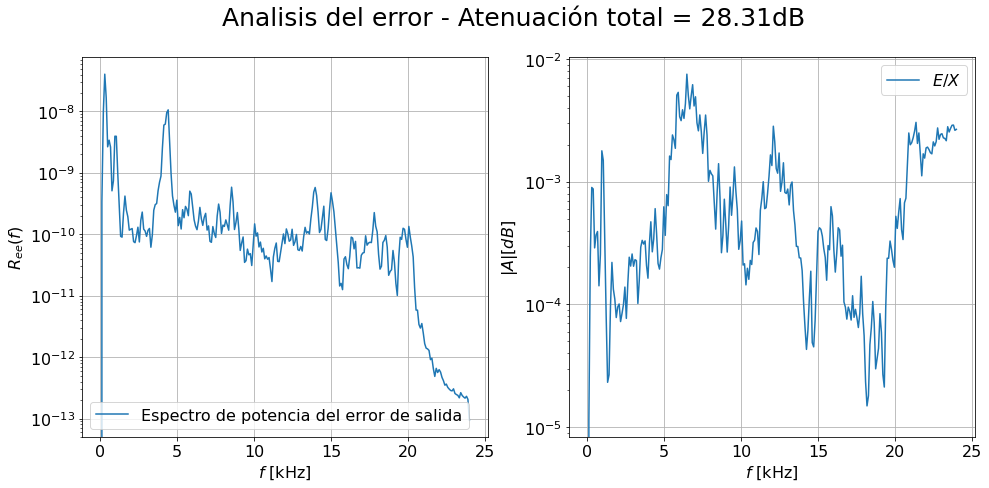

In [140]:
plot_helpers.plot_error_analysis(headphone.d[60000:], e_lms[60000:], 48000, 'Analisis del error', a_weighting=True)

# Conclusiones sobre la comparación entre RLS y LMS aplicado al modelado del camino primario $P(z)$
En primer lugar, se puede observar en la señal de error obtenida para el esquema con RLS, que el sistema converge rápidamente alcanzando un error muy bajo para aproximadamente $200$ iteraciones. El ensayo es realizado con condiciones de SNR alto, siendo la fuente de ruido el error de redondeo por la precisión finita para los números. En esta condición, se espera una convergencia en aproximadamente $2M$ iteraciones, y en este caso el tamaño del filtro adaptativo es $M = 1000$. La razón por la cual converge más rápido que lo esperado, es porque la respuesta del sistema físico posee valores significativos o predominantes en las primeras 100 muestras, por ende la convergencia efectiva será alrededor de $200$.

En segundo lugar, contrastando la convergencia de LMS y RLS, se puede observar que bajo las condiciones particulares de SNR alto, RLS converge mucho más rápido que LMS y además consigue una mejoría de aproximadamente 13dB en la atenuación resultante. Es importante aclarar que los resultados de atenuación podrían mejorar si se sigue corriendo cada filtro, de hecho LMS alcanza mejor valores, y seguro RLS también lo haga.